In [59]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [20]:
list_dict = []
with open('./data/pmcid_species.txt', 'r') as f:
    for l in f.readlines():
        line_dict = {}
        l = l.split(',')
        line_dict['pmcid'] = l[0]
        line_dict['species'] = l[1].rstrip()
        list_dict.append(line_dict)
print(len(list_dict))

4029235


In [21]:
df = pd.DataFrame.from_dict(list_dict)
#df = pd.read_csv('./data/pmcid_species.txt', sep=',', header=None, verbose=True)

In [100]:
species_val_count = df['species'].value_counts()[1:500]
species_val_count

human       243307
Human       146352
Animals     112596
bovine       63984
HIV          41321
             ...  
Acridine       238
soybeans       237
LDV            236
silkworm       236
macaques       236
Name: species, Length: 499, dtype: int64

<AxesSubplot: xlabel='species'>

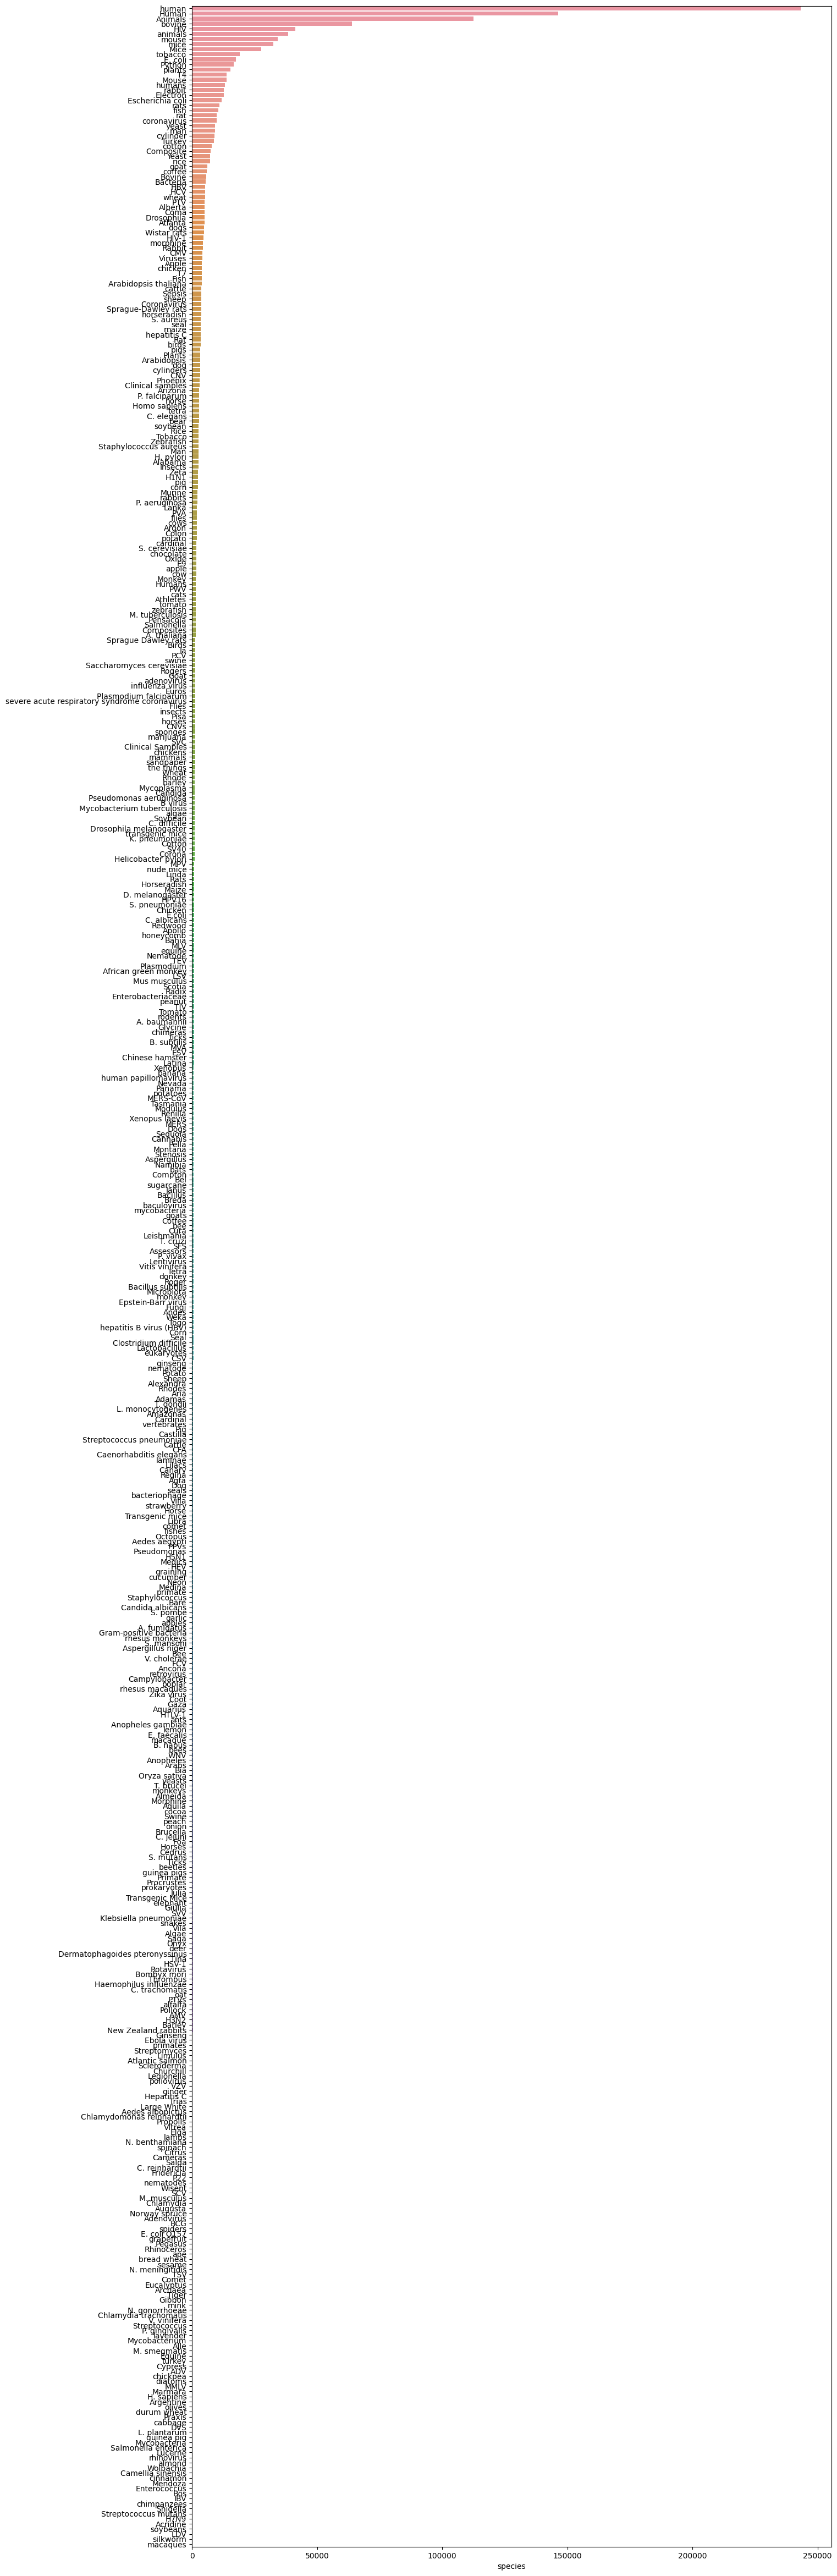

In [101]:
plt.figure(figsize=(15,60))
sns.barplot(y=species_val_count.index, x=species_val_count, orient='h')

In [79]:
# Low case terms of humans
human_terms = ['human', 'humans', 'man', 'homo sapiens', 'h. sapiens', 'homo_sapiens']
potential_not_included = ['athletes']

In [89]:
# Getting all the pmcid that get the human tag for species (one form or the other)
df["human"] = df['species'].str.lower().isin(human_terms)

In [90]:
df["human"].value_counts()

False    3610098
True      419137
Name: human, dtype: int64

In [99]:
# Saving that list for next step dl
df[df['human'] == True]['pmcid'].to_csv('./data/pmcid_humans.txt', index=False)